# MOHSIN BIN RAMZAN F22607016 BSAI

## 1. Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

## 2. Load and Explore the Dataset

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [7]:
# Display first few rows and basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoot

In [33]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet

In [9]:
# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [35]:
#print the duplicates values

print("\nDuplicates values in the dataset:")
print(df.duplicated().sum())


Duplicates values in the dataset:
0


## 3: Visualize the Dataset (Before Training)

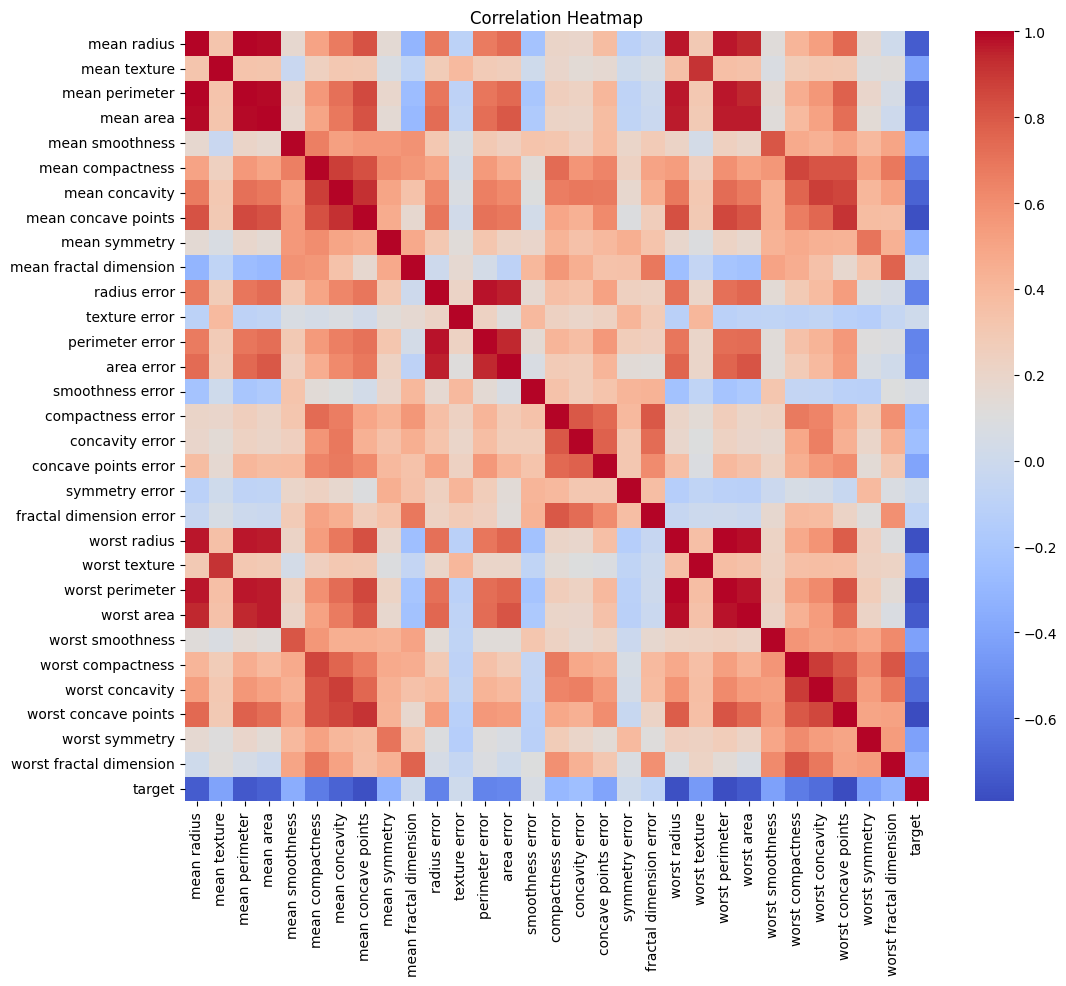

In [11]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

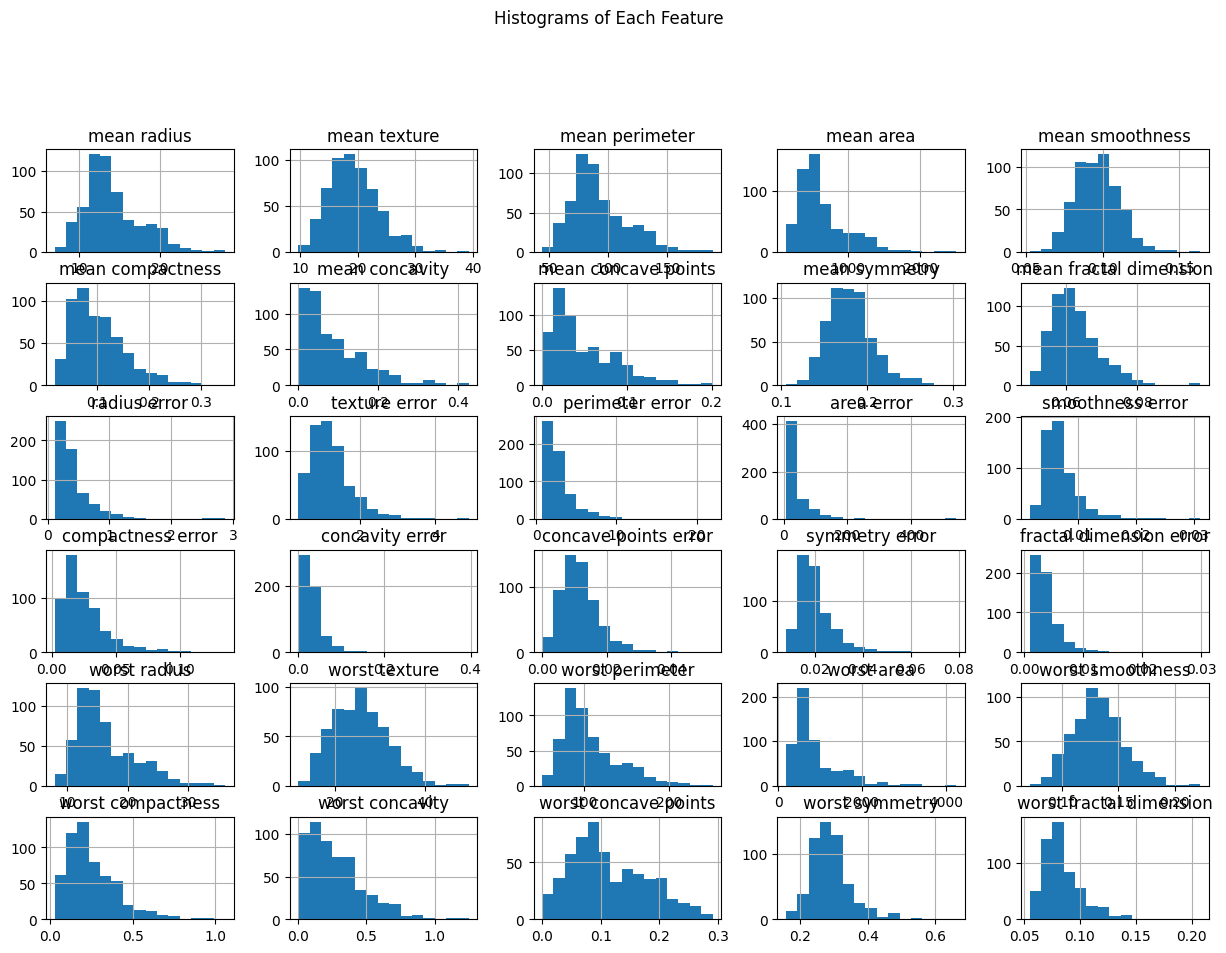

In [12]:
# Histogram of each feature
df.drop('target', axis=1).hist(bins=15, figsize=(15, 10), layout=(6, 5))
plt.suptitle("Histograms of Each Feature", y=1.02)
plt.show()

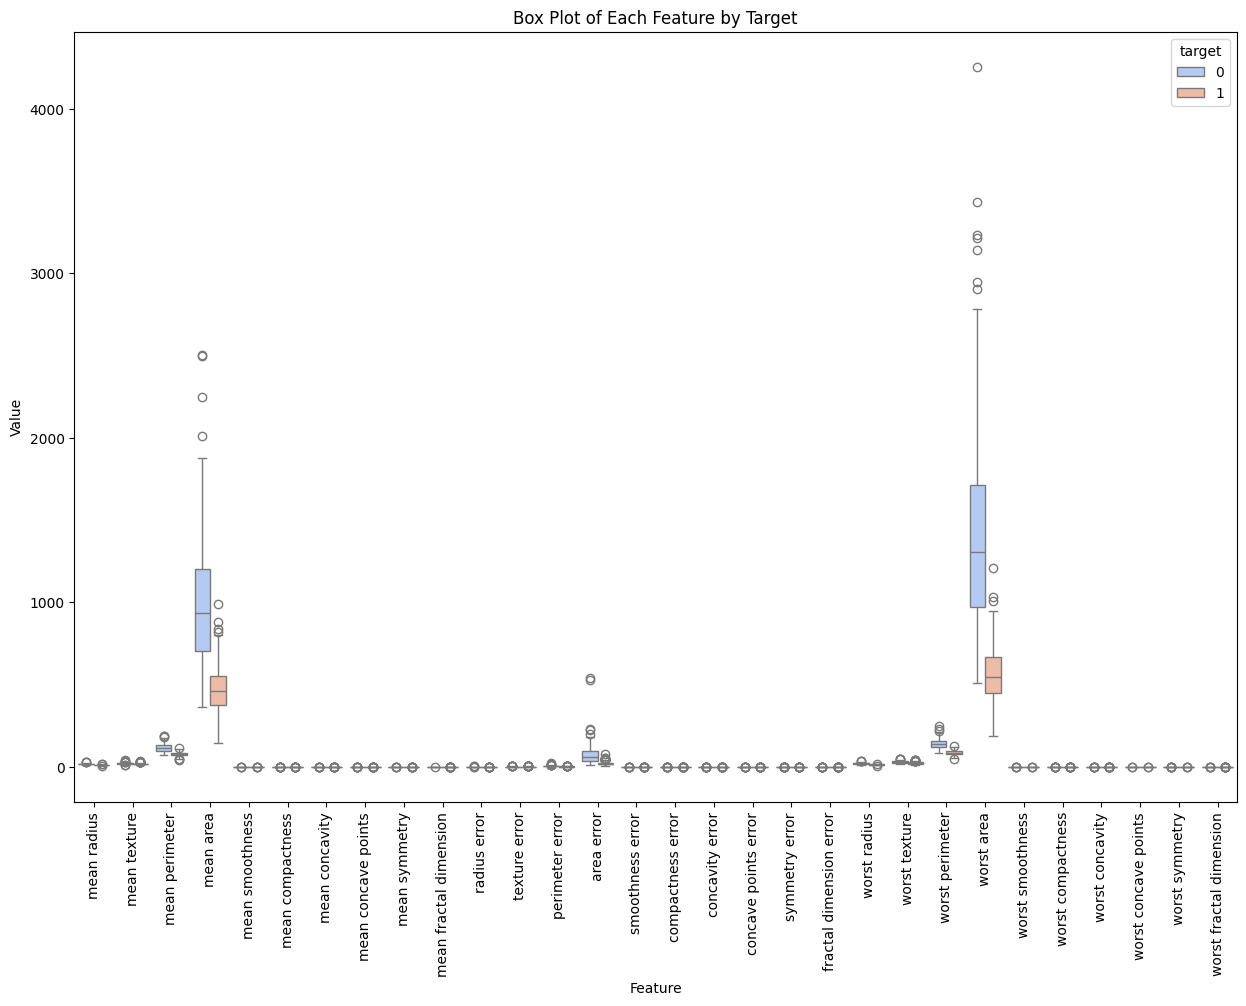

In [13]:
# Box plot to observe the spread and outliers in each feature grouped by target
plt.figure(figsize=(15, 10))
df_melt = pd.melt(df, id_vars='target', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='target', data=df_melt, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Box Plot of Each Feature by Target")
plt.show()

## 4: Split the Dataset Using Stratified Sampling

In [15]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 5: Data Pre-processing

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6: Dimensionality Reduction Using PCA

In [17]:
# Reduce dimensions to explain 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Number of components after PCA: {X_train_pca.shape[1]}")

Number of components after PCA: 10


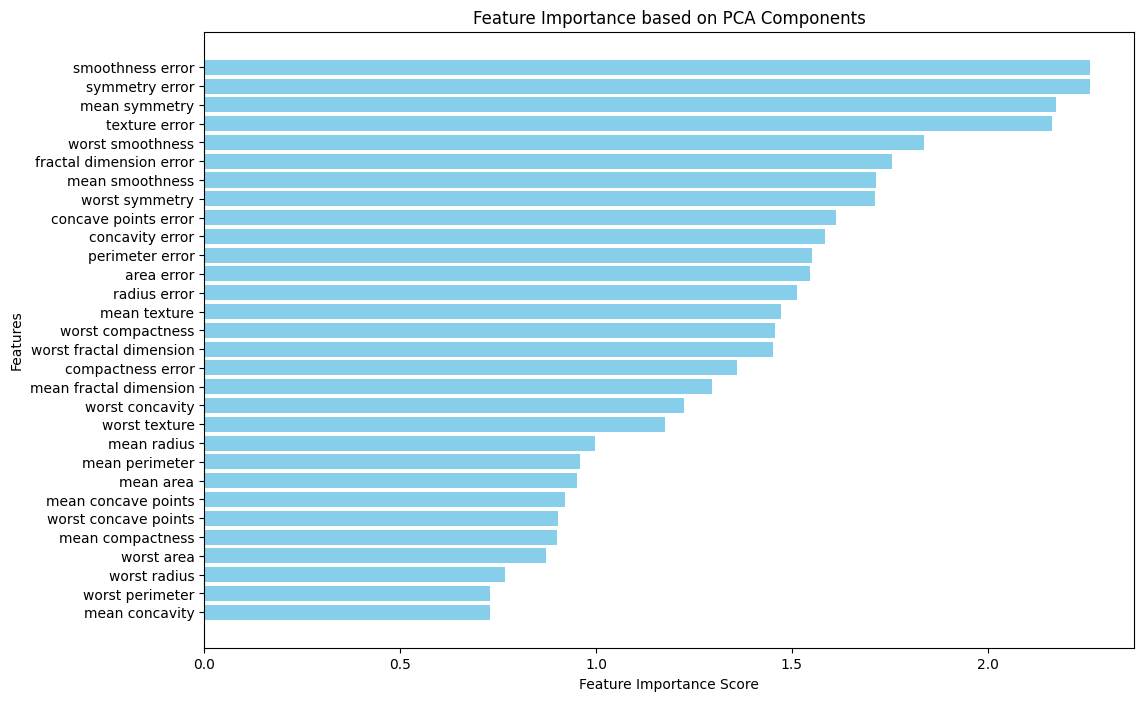

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the absolute values of the PCA components for each feature
feature_importance = np.abs(pca.components_)

# Sum the importance scores across all principal components to get overall importance per feature
overall_feature_importance = feature_importance.sum(axis=0)

# Create a DataFrame for easy plotting
feature_names = df.columns[:-1]  # Assuming the last column is the target
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": overall_feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance based on PCA Components")
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


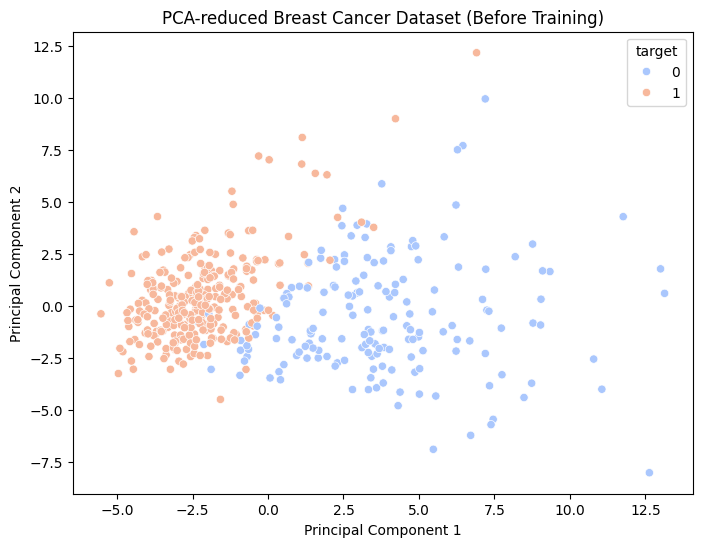

In [31]:
# Visualizing the dataset before training (using PCA-reduced features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='coolwarm')
plt.title('PCA-reduced Breast Cancer Dataset (Before Training)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 7: Train the SVM Classifier

In [20]:
# Train an SVM with RBF kernel (can try linear or other kernels as well)
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_pca, y_train)

SVC(probability=True, random_state=42)

## 8: Make Predictions and Evaluate the Model

In [21]:
# Predictions
y_pred = svm.predict(X_test_pca)
y_pred_prob = svm.predict_proba(X_test_pca)[:, 1]

In [22]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Evaluation Metrics:
Accuracy: 0.97
Precision: 0.99
Recall: 0.97
F1 Score: 0.98
ROC-AUC: 1.00


In [23]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [24]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[41  1]
 [ 2 70]]


## 9: Visualize the Results

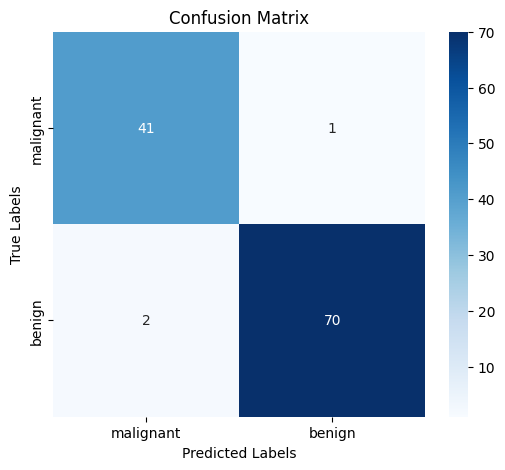

In [25]:
# Confusion Matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

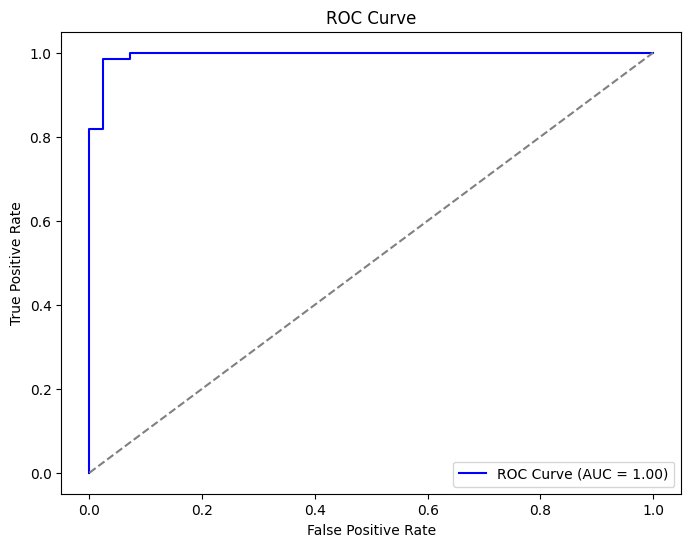

In [26]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
